# DNN (Deep Neural Network) :

Epoch 1/10
308/308 [==============================] - 11s 14ms/step - loss: 0.3389 - accuracy: 0.8518 - val_loss: 0.1859 - val_accuracy: 0.9221
Epoch 2/10
308/308 [==============================] - 3s 9ms/step - loss: 0.1559 - accuracy: 0.9359 - val_loss: 0.1252 - val_accuracy: 0.9431
Epoch 3/10
308/308 [==============================] - 3s 9ms/step - loss: 0.1575 - accuracy: 0.9411 - val_loss: 0.1279 - val_accuracy: 0.9495
Epoch 4/10
308/308 [==============================] - 3s 10ms/step - loss: 0.1308 - accuracy: 0.9536 - val_loss: 0.1081 - val_accuracy: 0.9486
Epoch 5/10
308/308 [==============================] - 3s 9ms/step - loss: 0.1253 - accuracy: 0.9531 - val_loss: 0.1064 - val_accuracy: 0.9540
Epoch 6/10
308/308 [==============================] - 3s 11ms/step - loss: 0.1121 - accuracy: 0.9615 - val_loss: 0.0960 - val_accuracy: 0.9632
Epoch 7/10
308/308 [==============================] - 3s 11ms/step - loss: 0.0952 - accuracy: 0.9655 - val_loss: 0.0849 - val_accuracy: 0.9702
E

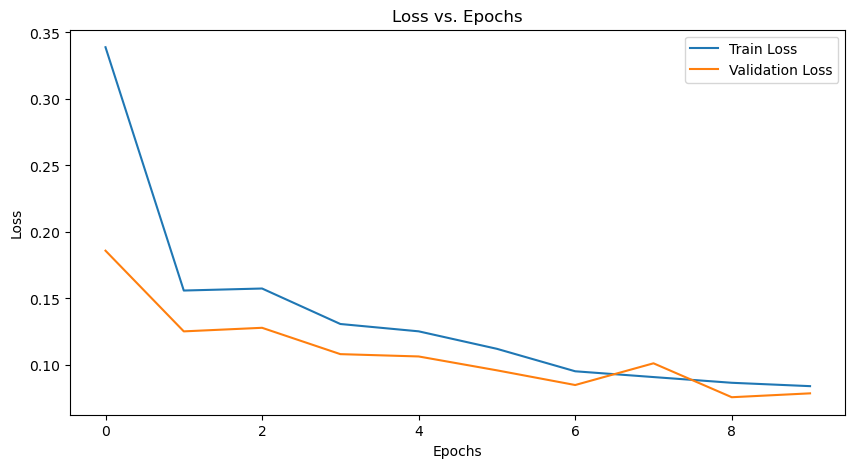

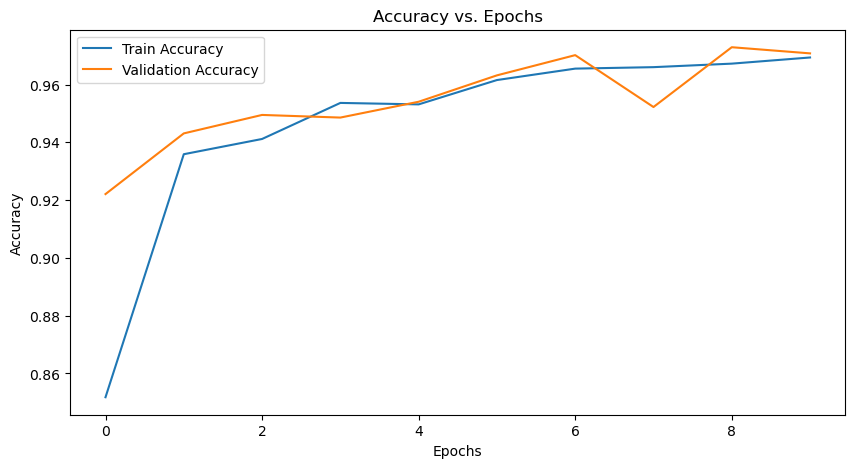

103/103 [==============================] - 1s 4ms/step
Accuracy: 0.9640900791235545
Precision: 0.9648390941597139
Recall: 0.9648390941597139
F1 Score: 0.9648390941597139


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv('../final_cleaned.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Créez le modèle DNN
model = models.Sequential()

# Couches fully connected (densément connectées)
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
              metrics=['accuracy'])

# Entraînez le modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Utilisez 'accuracy' ou 'acc' selon votre historique
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Utilisez 'val_accuracy' ou 'val_acc'
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [2]:

# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


dnn_results = pd.DataFrame([['Deep neurual network', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
dnn_results.to_csv('../evaluations/dnn_results.csv', index=False)

dnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Deep neurual network,0.96409,0.964839,0.964839,0.964839,0.964074


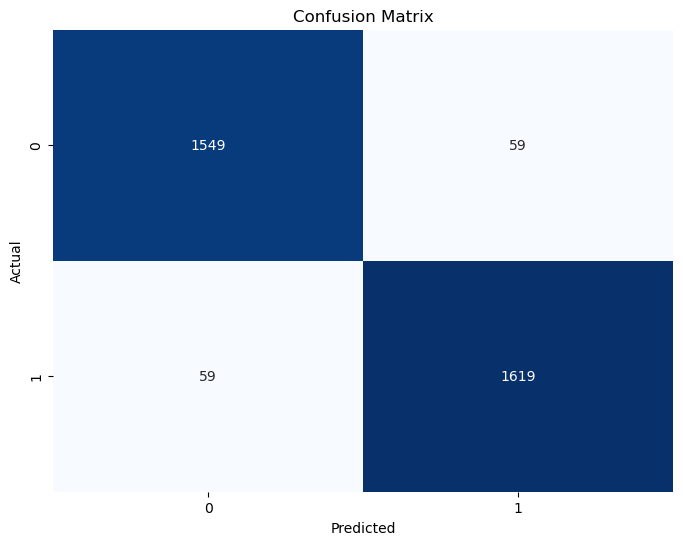

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()